In [1]:
#import packages
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('./Dataset/AirPassengers.csv')
df['Month']=pd.to_datetime(df['Month'])
df = df.set_index('Month')

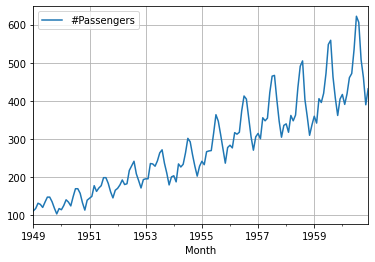

In [3]:
#imeseries plot
import matplotlib.pyplot as plt
df.plot()
plt.grid()
plt.show()

ADF Statistic: -3.040034394109993
p-value: 0.0313210882607278
number of lags: 11
number of observations: 130


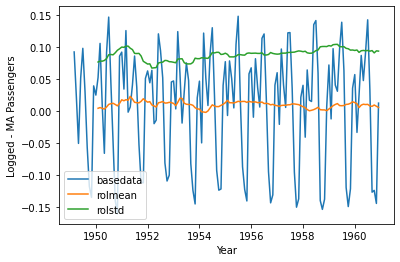

In [4]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Calculate log-return
df_log = np.log(df)

#log values - moving average
df_log_ma = (df_log - df_log.rolling(window=3).mean()).dropna()

# Run test and print
result_log_ma = adfuller(df_log_ma)

#plot log data
rolmean_log_ma = df_log_ma.rolling(12).mean()
rolstd_log_ma  = df_log_ma.rolling(12).std()

ori_log_ma = plt.plot(df_log_ma,label='basedata')
rollmean_log_ma = plt.plot(rolmean_log_ma,label='rolmean')
rollstd_log_ma = plt.plot(rolstd_log_ma,label='rolstd')
plt.legend()
plt.ylabel('Logged - MA Passengers')
plt.xlabel('Year')

#print ADF statistic and p-value
print('ADF Statistic:', result_log_ma[0])
print('p-value:', result_log_ma[1])
print('number of lags:', result_log_ma[2])
print('number of observations:', result_log_ma[3])

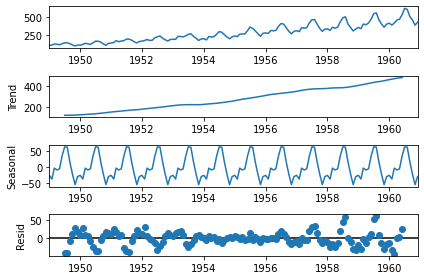

In [6]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

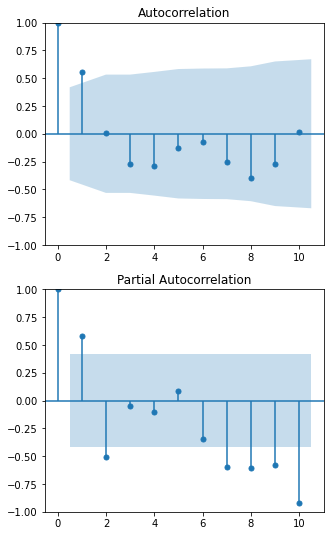

In [49]:
#we will use logscale-ma data
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,9))
 
# Plot the ACF of df
acf = acf(df_log_ma)
plot_acf(acf,lags=10, ax=ax1)

# Plot the PACF of df
pacf = pacf(df_log_ma)
plot_pacf(acf,lags=10, ax=ax2)

plt.show()

In [42]:
from sklearn.model_selection import train_test_split
#using train_test_split

train, test = train_test_split(df, test_size = 0.1, shuffle = False)

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
# Create a SARIMAX model
model = SARIMAX(train, order=(0,1,1), seasonal_order=(3,1,0,12))

# Fit the model
results = model.fit()

model_pred = results.predict(start='1959-10-01',end='1960-12-01')

# Print the results summary
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                         #Passengers   No. Observations:                  129
Model:             SARIMAX(0, 1, 1)x(3, 1, [], 12)   Log Likelihood                -434.950
Date:                             Thu, 03 Feb 2022   AIC                            879.899
Time:                                     22:40:43   BIC                            893.667
Sample:                                 01-01-1949   HQIC                           885.488
                                      - 09-01-1959                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2718      0.078     -3.480      0.001      -0.425      -0.119
ar.S.L12      -0.1003      

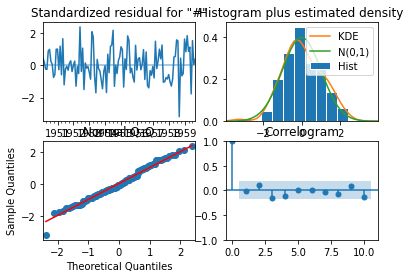

In [11]:
results.plot_diagnostics()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test,model_pred)
error

204.31424014234793

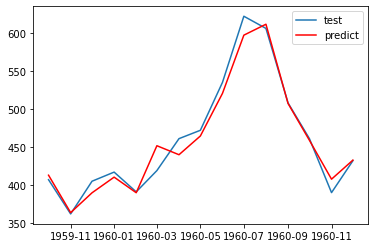

In [35]:
plt.plot(test,label='test')
plt.plot(model_pred,color='red',label='predict')
plt.legend(loc='best')
plt.show()

In [14]:
residual = test['#Passengers'] - model_pred
residual

Month
1959-10-01    -7.788841
1959-11-01    -3.328447
1959-12-01    12.934636
1960-01-01     4.302987
1960-02-01    -2.151100
1960-03-01   -34.793272
1960-04-01    18.451143
1960-05-01     5.009957
1960-06-01    13.556627
1960-07-01    24.296462
1960-08-01    -4.767472
1960-09-01    -0.614087
1960-10-01    -1.484806
1960-11-01   -22.008288
1960-12-01    -6.164563
dtype: float64

<AxesSubplot:xlabel='Month'>

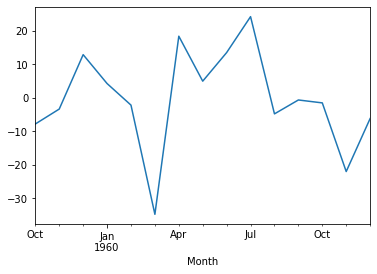

In [15]:
residual.plot()

In [36]:
# Create a SARIMAX model
model = SARIMAX(df, order=(1,1,0), seasonal_order=(3,1,0,12))

# Fit the model
results = model.fit()

model_pred_forecast = results.predict(start='1960-12-01',end='1963-12-01')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


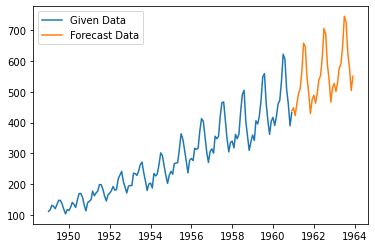

In [37]:
plt.plot(df,label='Given Data')
plt.plot(model_pred_forecast,label='Forecast Data')
plt.legend()

In [ ]:
#the result is good enough but we can check is the order and seasonal order are in the best values?

In [18]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [39]:
#automation using pmdarima
import pmdarima as pm
# Create model for SARIMAX(p,1,q)(P,1,Q)12
model2 = pm.auto_arima(df,
                      seasonal=True, m=12,
                      d=1, D=1, 
                      start_p=0, start_q=0,
                      max_p=5, max_q=5,
                      max_P=5, max_Q=5,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.19 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.21 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.07 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.21 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.29 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [ ]:
#Best model:  ARIMA(0,1,1)(2,1,0)[12] 